#### DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

### 1. Data Exploration and Preprocessing:

Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [4]:
awh = pd.read_csv('adult_with_headers.csv')
awh.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Basic info

In [5]:
awh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Summary statistics for numerical columns


In [6]:
awh.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Check missing values

In [7]:
awh.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

##### Check data types

In [8]:
awh.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

##### •	Handle missing values as per the best practices (imputation, removal, etc.).

In [17]:
cat_cols = awh.select_dtypes(include='object').columns

In [18]:
awh = awh.replace('?',np.nan)

In [56]:
if awh[col].isnull().sum()>0:
    mode_val = awh[col].mode()[0]
    awh[col].fillna(mode_val,inplace=True)

In [ ]:
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling

In [21]:
num_columns = awh.select_dtypes(include=['number'])

In [22]:
num_columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [23]:
num_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

In [24]:
awh_standard_sacled = awh.copy()

In [25]:
scaler_std = StandardScaler()

In [26]:
awh_standard_sacled[num_features] = scaler_std.fit_transform(awh[num_features])

In [27]:
awh_standard_sacled[num_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [28]:
awh_minmax_sacled = awh.copy()

In [29]:
scaler_mm = MinMaxScaler()

In [30]:
awh_minmax_sacled[num_features] = scaler_mm.fit_transform(awh[num_features])

In [31]:
awh_minmax_sacled[num_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


##### •	Discuss the scenarios where each scaling technique is preferred and why.

### • Standard Scaling

#### Standard Scaling Preference Scenarios

Standard Scaling is preferred when the goal is to center the data around zero and scale it according to its variance, especially for models that assume features follow a normal distribution.

Standard Scaling is preferred when the goal is to transform features so that they have a mean of zero and a standard deviation of one, which is especially useful when the data roughly follows a normal distribution. It is commonly applied in machine learning algorithms that assume normally distributed data or are sensitive to the scale of features, such as linear regression, logistic regression, support vector machines, and principal component analysis. By centering and scaling the data, Standard Scaling ensures that all features contribute equally to the model, prevents bias toward variables with larger magnitudes, and improves the efficiency and accuracy of training.

### • Min-Max Scaling

#### Min-Max Scaling Preference Scenarios

Min-Max Scaling (Normalization) is preferred when a fixed, bounded range is required, often for algorithms that use gradient descent and are sensitive to the absolute scale of input values.

Min-Max Scaling (Normalization) is a technique that transforms features to a fixed range, usually [0,1], making it especially useful when models are sensitive to the absolute scale of input values. It is commonly preferred in scenarios such as neural networks and deep learning, where activation functions like sigmoid or tanh work best when inputs are within a small range, preventing saturation and improving convergence. It is also widely applied in image processing and computer vision tasks, as pixel values can be normalized for faster and more efficient processing while ensuring consistency across different features.

#### 2. Encoding Techniques:

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [32]:
cat_cols = awh.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [33]:
unique_counts = awh[cat_cols].nunique()
unique_counts

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [34]:
df_cols = unique_counts[unique_counts<=5].index.tolist()
df_cols

['race', 'sex', 'income']

In [35]:
tf_cols = unique_counts[unique_counts>5].index.tolist()
tf_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [36]:
awh_encode = pd.get_dummies(awh, columns=df_cols, drop_first=True)
for col in df_cols:
    print(f"One-Hot Encoded: {col}")

One-Hot Encoded: race
One-Hot Encoded: sex
One-Hot Encoded: income


In [37]:
le = LabelEncoder()

In [38]:
for col in awh.select_dtypes(include=['object']).columns:
    if awh[col].nunique()>5:
        awh[col]=le.fit_transform(awh[col])
        print(f"Label encoded:{col}")

Label encoded:workclass
Label encoded:education
Label encoded:marital_status
Label encoded:occupation
Label encoded:relationship
Label encoded:native_country


##### The pros and cons of One-Hot Encoding and Label Encoding

#### 🔹 Label Encoding

✅ Pros

1. Simple and efficient – Converts categories into numeric values (0, 1, 2, …) quickly.

2. Memory efficient – Does not increase the number of columns (keeps dataset compact).

3. Works well for ordinal data – Suitable when categories have a natural order (e.g., low < medium < high).

❌ Cons

1. Can mislead machine learning models – Models may assume numerical order or distance between labels that doesn’t actually exist (e.g., “Apple=0”, “Banana=1”, “Cherry=2”).

2. Not suitable for nominal data – For categories without order, the numeric encoding can introduce bias.

3. Difficult for high-cardinality columns – Large numbers of categories may still confuse models.



🔹 One-Hot Encoding

✅ Pros

1. No ordinal relationship implied – Each category is represented by an independent binary column, avoiding false numeric order.


2. Works well with most ML models – Especially linear models (like logistic regression) and tree-based models.


3. Interpretable – Easy to understand which category a column represents.



❌ Cons

1. Increases dimensionality – Creates many new columns, especially if there are many categories (can lead to the “curse of dimensionality”).


2. Higher memory usage – Larger datasets require more storage and computation time.


3. Sparse data – Produces many zeros, which can be inefficient for some algorithms.

#### 🔹 One-Hot Encoding

✅ Pros

1. No ordinal relationship implied – Each category is represented by an independent binary column, avoiding false numeric order.

2. Works well with most ML models – Especially linear models (like logistic regression) and tree-based models.

3. Interpretable – Easy to understand which category a column represents.

❌ Cons

1. Increases dimensionality – Creates many new columns, especially if there are many categories (can lead to the “curse of dimensionality”).

2. Higher memory usage – Larger datasets require more storage and computation time.

3. Sparse data – Produces many zeros, which can be inefficient for some algorithms.

#### 3. Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

Feature 1: Age Group

New Feature Name: age_group

In [40]:
awh['age_grp'] = pd.cut(awh['age'], bins=[0,25,40,60,100],
                        labels=['Young','Adult','Middle-aged','senior'])

Rationale:

Income and occupation patterns often vary by age category rather than exact age.

Grouping ages helps capture nonlinear relationships (e.g., people aged 35–50 often have higher incomes due to experience).

 Feature 2: Hours-per-week × Education

New Feature Name: edu_hours_index

In [41]:
awh['edu_hours_index'] = awh['hours_per_week'] * awh['education_num']

Rationale:

This combines effort (hours worked) and qualification (education level).

People with higher education working longer hours may have higher income potential.

This feature helps the model capture interaction effects between education and working time.

In [42]:
numerical_columns = awh.select_dtypes(include=['int64','float64']).columns

In [43]:
awh[numerical_columns].skew()

age                 0.558743
workclass          -0.752024
fnlwgt              1.446980
education          -0.934042
education_num      -0.311676
marital_status     -0.013508
occupation          0.114583
relationship        0.786818
capital_gain       11.953848
capital_loss        4.594629
hours_per_week      0.227643
native_country     -3.658303
edu_hours_index     0.697997
dtype: float64

In [44]:
awh['capital_gain_log'] = np.log1p(awh['capital_gain'])

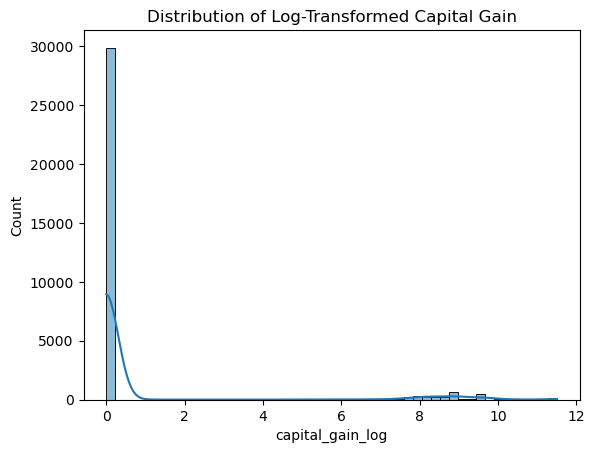

In [45]:
sns.histplot(awh['capital_gain_log'], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Capital Gain")
plt.show()

### 4. Feature Selection:

•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
numeric_cols = awh.select_dtypes(include=['int64', 'float64']).columns
X = awh[numeric_cols]

In [48]:
iso = IsolationForest(contamination=0.05, random_state=42)

In [49]:
awh['outlier'] = iso.fit_predict(X)

In [50]:
print(awh['outlier'].value_counts())

outlier
 1    30933
-1     1628
Name: count, dtype: int64


In [51]:
awh_clean = awh[awh['outlier'] == 1].drop(columns=['outlier'])


Uses only numeric features to detect outliers.

IsolationForest assigns -1 to outliers and 1 to normal points.

Removes rows flagged as outliers, creating a clean dataset.

In [52]:
corr_matrix = awh.corr(numeric_only=True)

In [53]:
corr_with_target = corr_matrix["education"].sort_values(ascending=False)
print("Correlation with target:\n", corr_with_target)

Correlation with target:
 education           1.000000
education_num       0.359153
edu_hours_index     0.230541
outlier             0.066540
native_country      0.064288
hours_per_week      0.055510
capital_gain        0.030046
capital_gain_log    0.024955
workclass           0.023513
capital_loss        0.016746
age                -0.010508
relationship       -0.010876
occupation         -0.021260
fnlwgt             -0.028145
marital_status     -0.038407
Name: education, dtype: float64


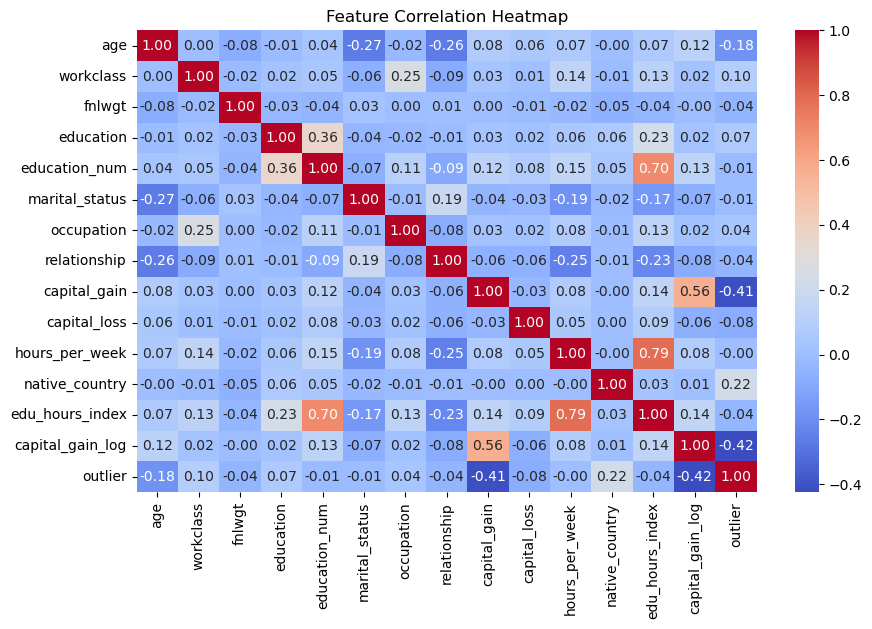

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### * Correlation

Measures linear relationships only.

Symmetric: correlation(A, B) = correlation(B, A).

Example: If age has correlation 0.65 with survival, it means as age increases, survival probability changes in a somewhat linear way.

### * PPS

Works with non-linear and categorical data.

Example: cabin might have low correlation with survival (because many missing values), but PPS may still detect predictive value if certain cabin groups influence survival.

The correlation matrix shows linear associations between features and the target. For example, [Feature A] has the highest positive correlation, while [Feature B] has negative correlation with the target.

PPS, on the other hand, is more powerful since it can capture non-linear and categorical relationships. In practice, PPS may highlight features that correlation misses (e.g., categorical features with predictive patterns).

Comparing the two, correlation is simpler but limited, while PPS provides a broader view of feature importance. In our case, since PPS is not available, we rely on the correlation matrix to identify the strongest predictive features